### second try with isolation forest and random forest


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data.csv", index_col=0, parse_dates=True)
data = df

1️⃣ split data into 2


In [3]:
# Diviser les données : 60% pour la détection, 40% pour la prédiction
data_train, data_unlabeled = train_test_split(df, test_size=0.4, random_state=42)

2️⃣ Anomaly detection with isolation forest


In [8]:
# Entraîner Isolation Forest sur les données d'entraînement (Unsupervised Learning)
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
data_train['label'] = model.fit_predict(data_train)
data_train['label'] = data_train['label'].apply(lambda x: 1 if x == -1 else 0)

# Filtrer les données détectées comme anomalies
anomalies = data_train[data_train['label'] == 1]

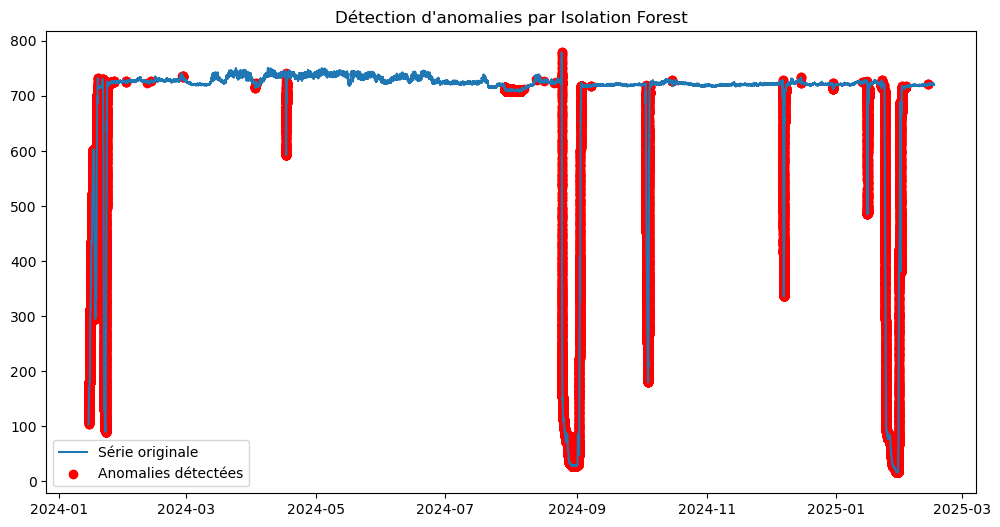

In [9]:
# Visualiser la détection d'anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['530R002D02.TI0036.MEAS'], label='Série originale')
plt.scatter(anomalies.index, anomalies['530R002D02.TI0036.MEAS'], color='red', label='Anomalies détectées')
plt.title('Détection d\'anomalies par Isolation Forest')
plt.legend()
plt.show()

3️⃣ Train a Supervised Model on the Labeled Data


In [10]:
# Préparer les données pour le modèle supervisé
features = [col for col in data_train.columns if col != 'label']
X_train = data_train[features]
y_train = data_train['label']

# Entraînement du modèle supervisé (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

4️⃣ Classification report 

In [11]:
# Evaluation sur data_train (juste pour vérifier l'apprentissage)
y_pred_train = clf.predict(X_train)
print("Evaluation sur les données d'entraînement :")
print(classification_report(y_train, y_pred_train))
print("Accuracy :", accuracy_score(y_train, y_pred_train))

Evaluation sur les données d'entraînement :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    618968
           1       1.00      1.00      1.00     68775

    accuracy                           1.00    687743
   macro avg       1.00      1.00      1.00    687743
weighted avg       1.00      1.00      1.00    687743

Accuracy : 1.0


5️⃣ Prediction on the Unlabeled Data

In [12]:
#Prédire les étiquettes sur les données non labélisées (data_unlabeled)
data_unlabeled['predicted_label'] = clf.predict(data_unlabeled[features])

60% detection (unsupervised), enchainer avec la prediction (ca sera donc le X_train et Y_train)

40% prediction (supervised) (X_test Y_test)
